In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('h1b_kaggle.csv')
df.shape

(3002458, 11)

In [3]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [4]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
df1 = df.copy()

In [6]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of          Unnamed: 0          CASE_STATUS  \
0                 1  CERTIFIED-WITHDRAWN   
1                 2  CERTIFIED-WITHDRAWN   
2                 3  CERTIFIED-WITHDRAWN   
3                 4  CERTIFIED-WITHDRAWN   
4                 5            WITHDRAWN   
...             ...                  ...   
3002453     3002454                  NaN   
3002454     3002455                  NaN   
3002455     3002456                  NaN   
3002456     3002457                  NaN   
3002457     3002458                  NaN   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
...                                                    .

In [7]:
df.dropna

<bound method DataFrame.dropna of          Unnamed: 0          CASE_STATUS  \
0                 1  CERTIFIED-WITHDRAWN   
1                 2  CERTIFIED-WITHDRAWN   
2                 3  CERTIFIED-WITHDRAWN   
3                 4  CERTIFIED-WITHDRAWN   
4                 5            WITHDRAWN   
...             ...                  ...   
3002453     3002454                  NaN   
3002454     3002455                  NaN   
3002455     3002456                  NaN   
3002456     3002457                  NaN   
3002457     3002458                  NaN   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
...                                                    ...   
300

In [8]:
df.CASE_STATUS.value_counts()


CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

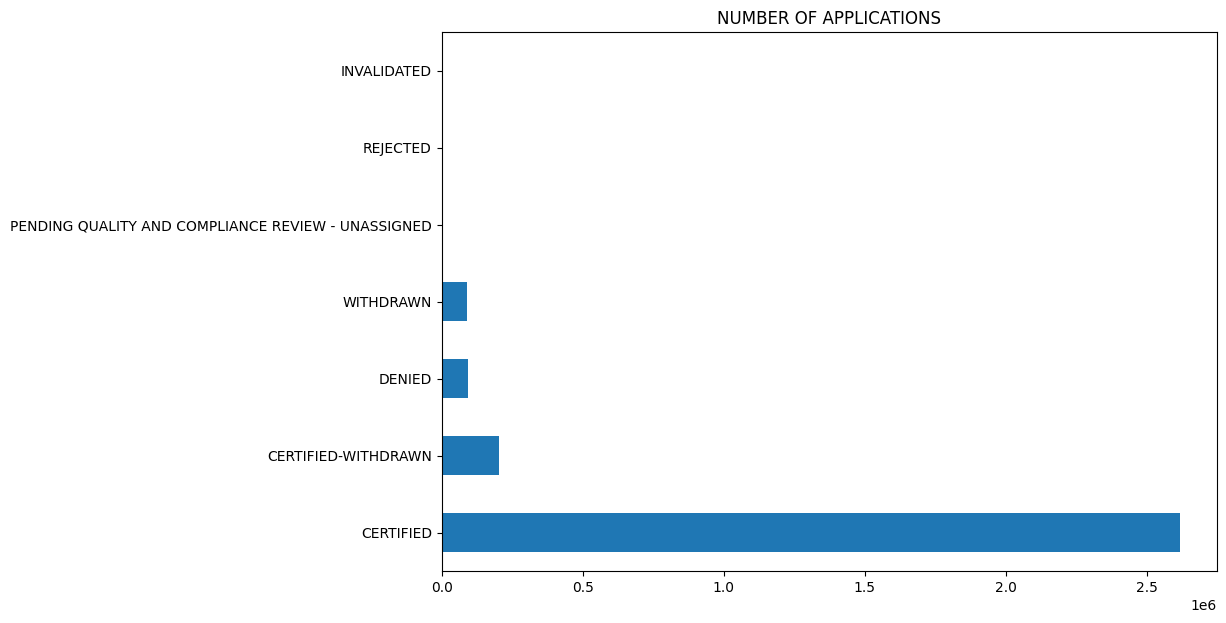

In [9]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

<AxesSubplot: >

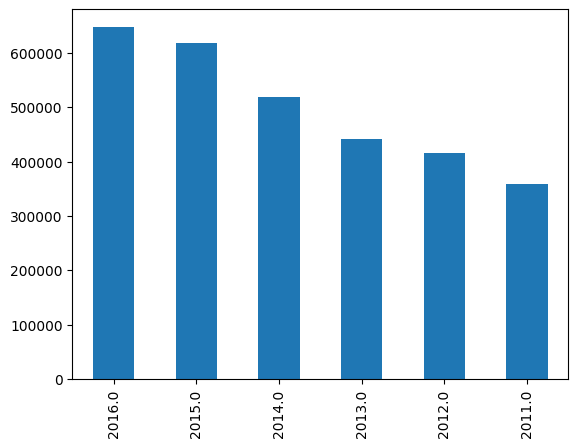

In [10]:
df.YEAR.value_counts().plot(kind = 'bar')

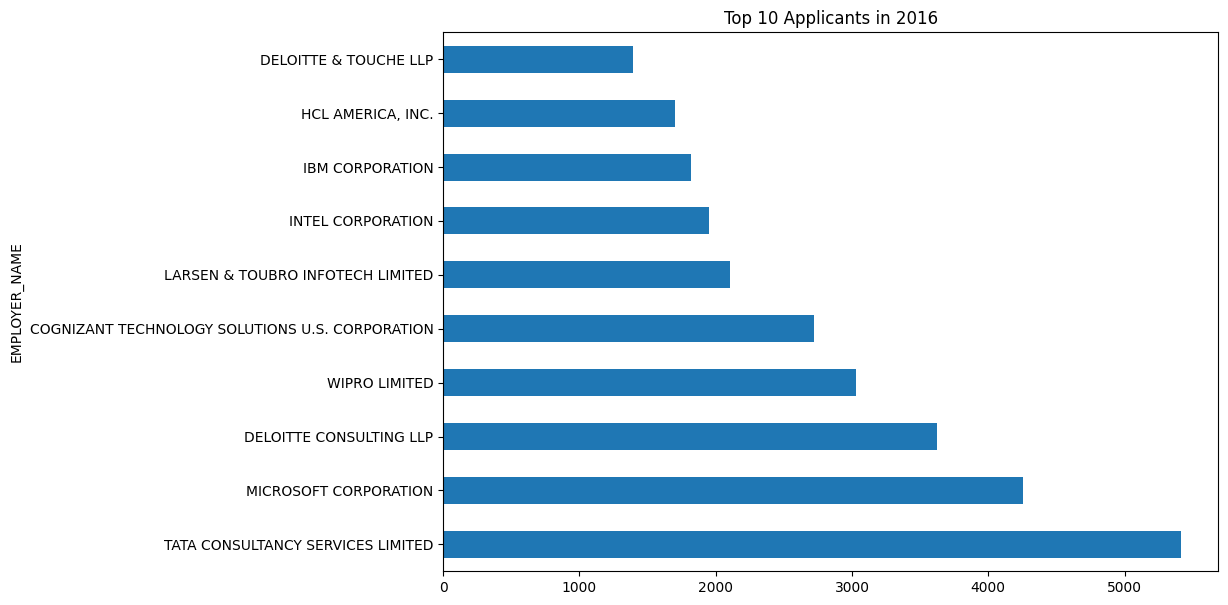

In [11]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016",
                                                                                                                        )
ax1.set_label("")
plt.show()

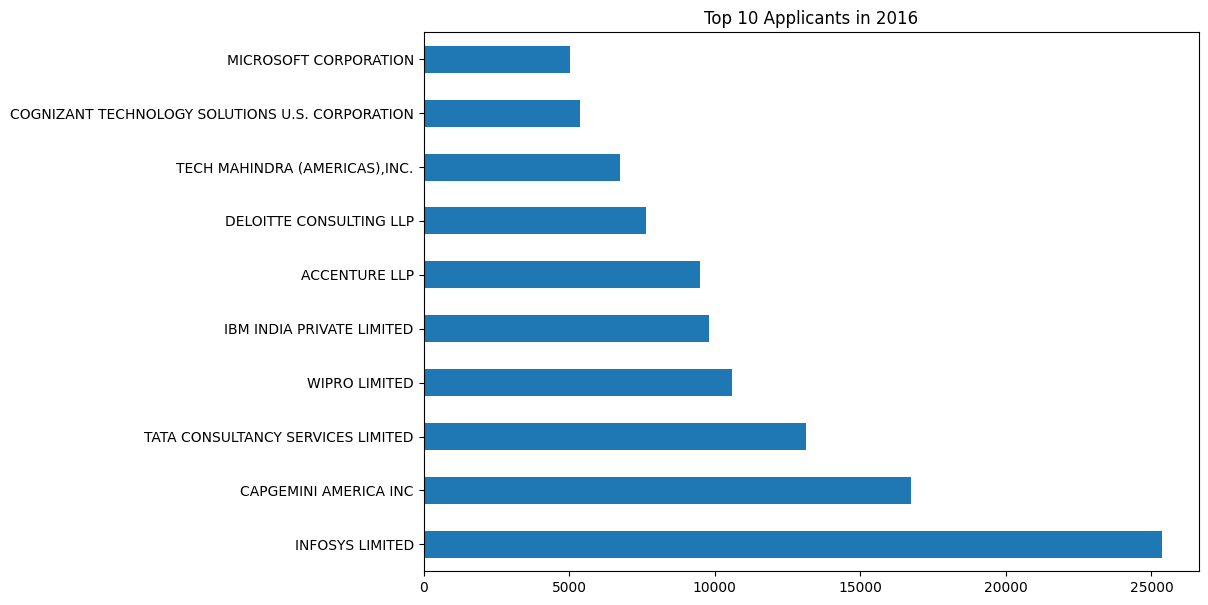

In [12]:
plt.figure(figsize=(10,7))

ax2 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                            )
ax2.set_ylabel("")
plt.show()

In [13]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

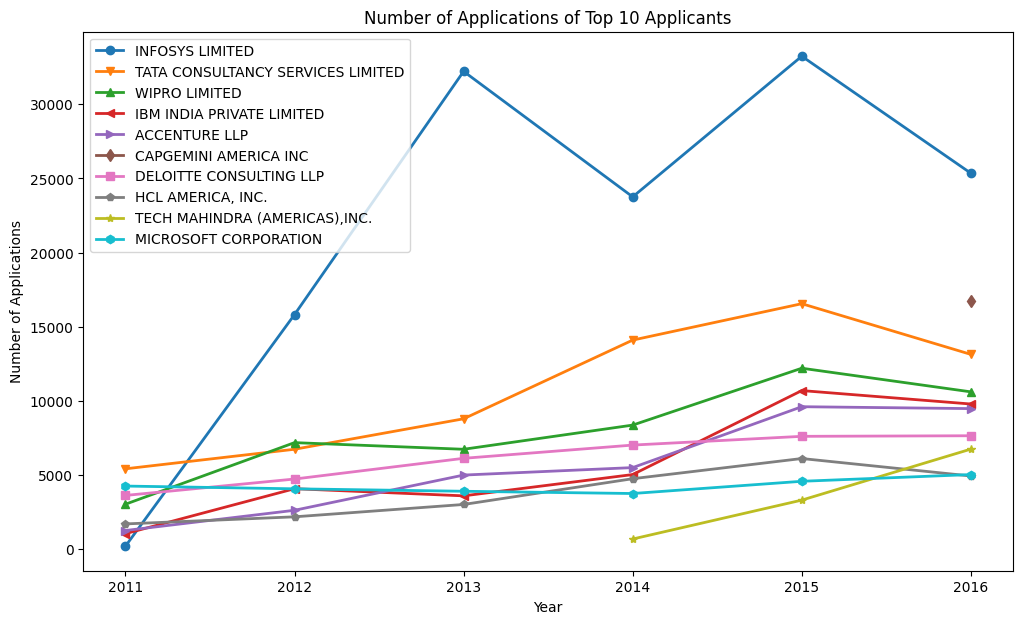

In [14]:


plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\492497919.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = byempyear.mean().loc[company]


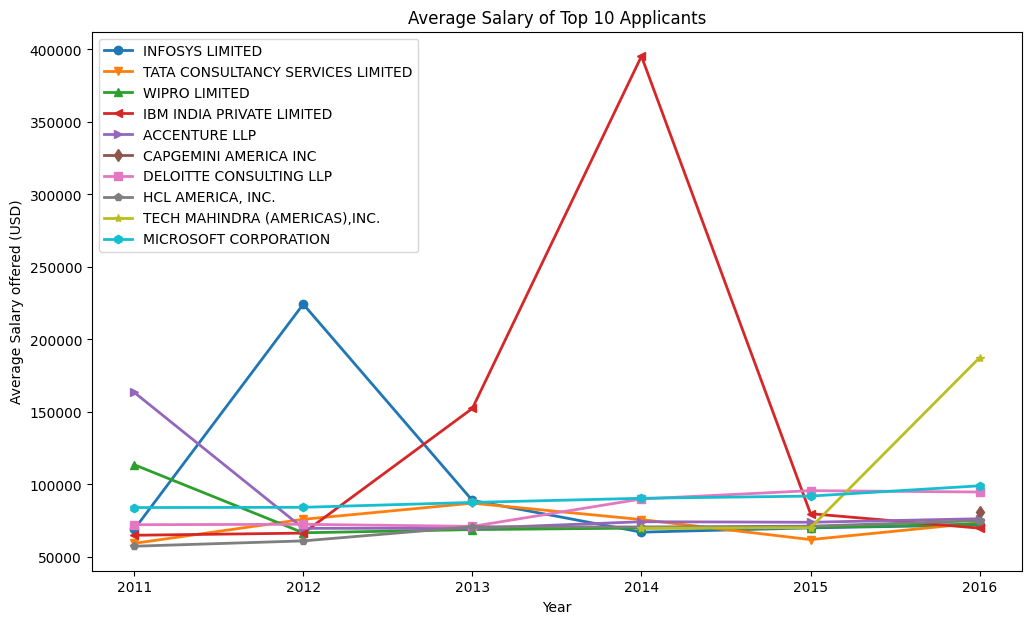

In [15]:
plt.figure(figsize=(12,7))

for company in top_emp:
    tmp = byempyear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Average Salary offered (USD)")
plt.legend()
plt.title('Average Salary of Top 10 Applicants')
plt.show()

In [16]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


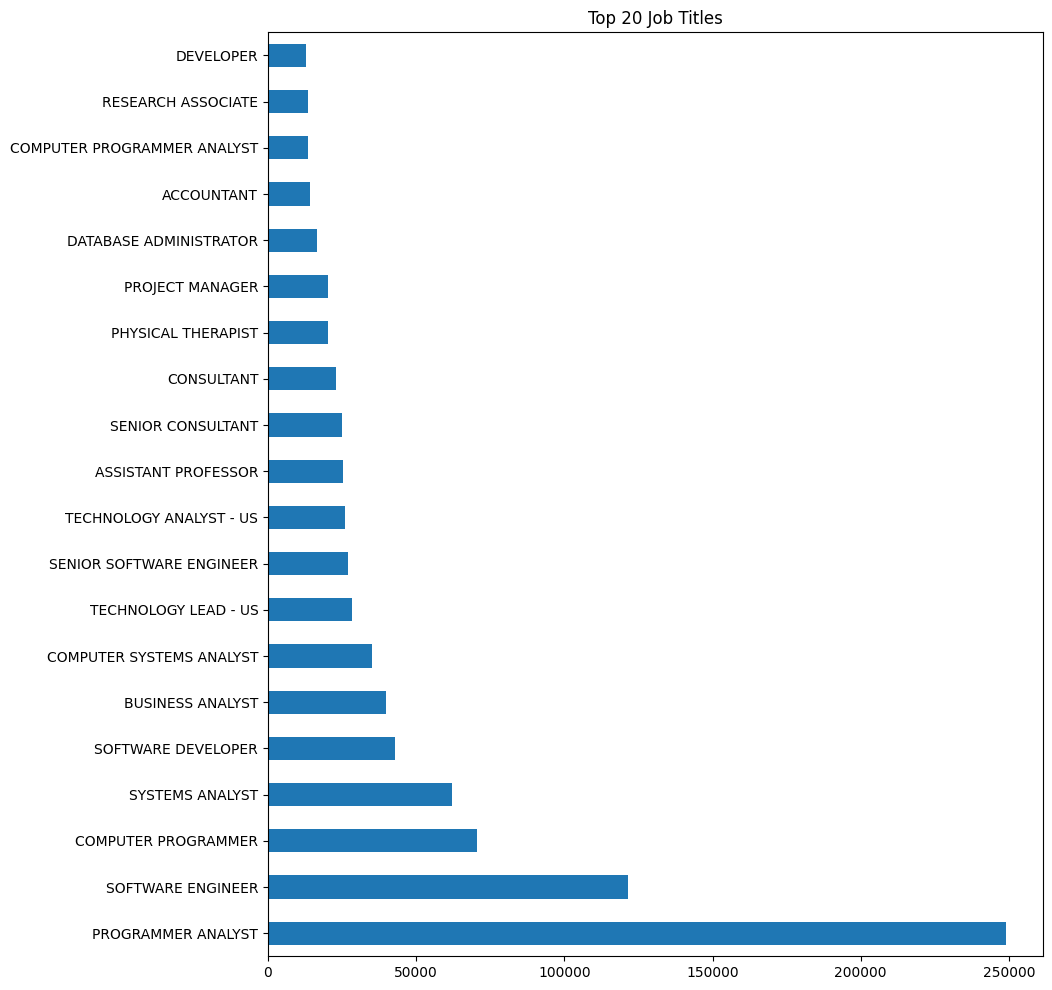

In [17]:
plt.figure(figsize=(10,12))
df.JOB_TITLE.value_counts().nlargest(20).plot(kind = 'barh', title = "Top 20 Job Titles")
plt.show()

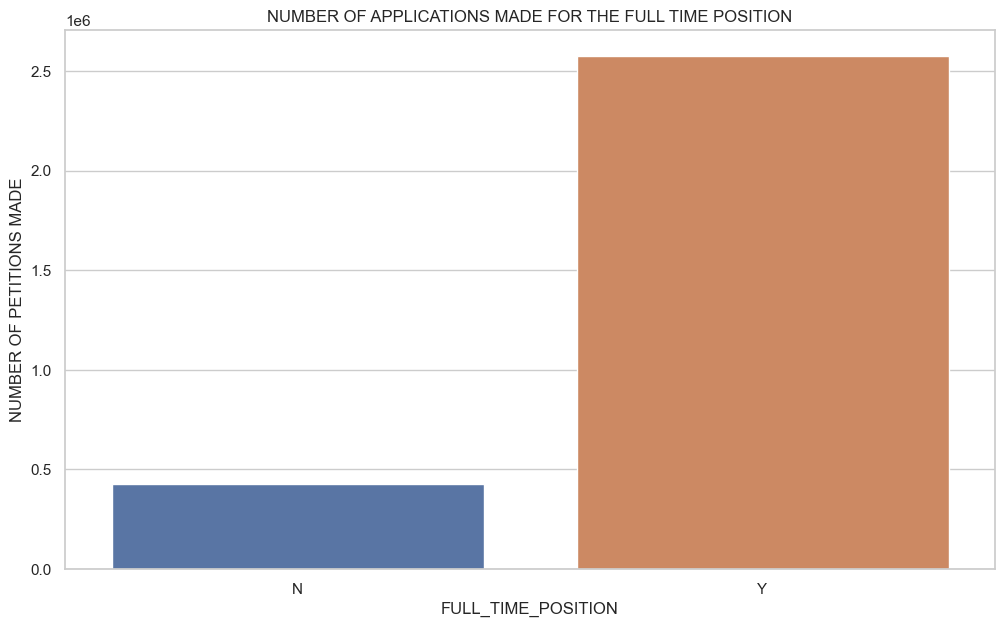

In [18]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()


In [19]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

In [20]:
df.PREVAILING_WAGE.max()

499417.0

In [21]:
## Checking for null values
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [22]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\812740542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])


In [23]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2615530
CERTIFIED-WITHDRAWN                                    202650
DENIED                                                  92149
WITHDRAWN                                               89565
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [24]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3, 
                                           'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4, 'REJECTED' : 5, 'INVALIDATED' : 6})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\1124785831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3,


In [25]:
df.FULL_TIME_POSITION.value_counts()


Y    2573666
N     426246
Name: FULL_TIME_POSITION, dtype: int64

In [26]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\1045364823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,1,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,3,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [27]:
df['SOC_NAME'].value_counts()

Computer Systems Analysts                          308564
Computer Programmers                               226272
SOFTWARE DEVELOPERS, APPLICATIONS                  221745
COMPUTER SYSTEMS ANALYSTS                          215315
Software Developers, Applications                  192692
                                                    ...  
ELEMENTARY SCHOOL TEACHERS, EXCEPT SPECIAL EDU          1
27-3031                                                 1
HEALTH PROFESSIONALS AND TECHNICIANS, ALL OTHER         1
15-1132                                                 1
Earth Drillers, Except Oil and Gas                      1
Name: SOC_NAME, Length: 2130, dtype: int64

In [28]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\4163535952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'] = 'others'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\4163535952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\4163535952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\4163535952.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\4163535952.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8732\4163535952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [29]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])


In [31]:
df = df.drop(['SOC_NAME1'], axis=1)

<AxesSubplot: >

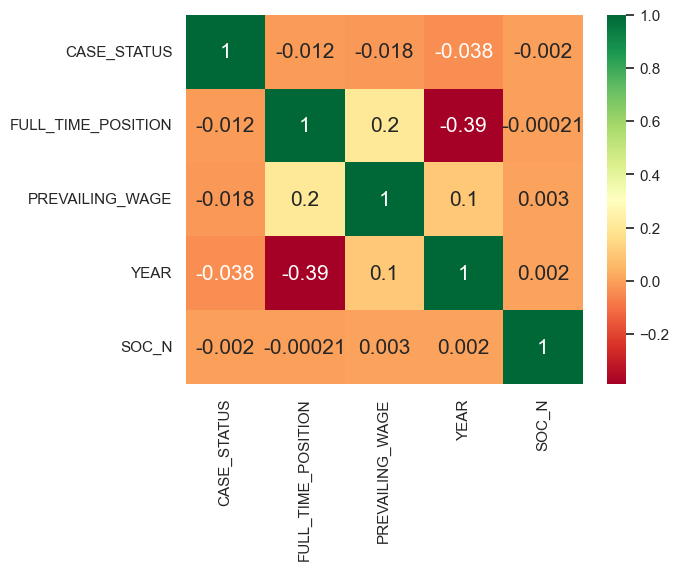

In [32]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [33]:
x = df.drop(['CASE_STATUS'], axis=1) # Independent variables
y = df['CASE_STATUS']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1) 
print(x_train.shape)
print(x_test.shape)

(2399929, 4)
(599983, 4)


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=6,n_jobs=-1,max_depth=5)

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=6, n_jobs=-1)

In [37]:
pred = model.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
score = r2_score(y_test,pred)

In [39]:
score*100

0.7856782558031461

In [81]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [41]:
x_train.columns

Index(['FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'SOC_N'], dtype='object')

In [73]:
for col in ['FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'SOC_NAME','CASE_STATUS']:
    print(df1[col].value_counts(),'\n','*'*50)

Y    2576111
N     426332
Name: FULL_TIME_POSITION, dtype: int64 
 **************************************************
6.000000e+04    10354
5.524500e+04     6865
6.256600e+04     6655
5.805300e+04     5755
5.249900e+04     5561
                ...  
4.548996e+04        1
7.624000e+04        1
1.135050e+05        1
1.196090e+05        1
1.370179e+08        1
Name: PREVAILING_WAGE, Length: 56156, dtype: int64 
 **************************************************
2016.0    647803
2015.0    618727
2014.0    519427
2013.0    442114
2012.0    415607
2011.0    358767
Name: YEAR, dtype: int64 
 **************************************************
Computer Systems Analysts                          291170
Computer Programmers                               226574
SOFTWARE DEVELOPERS, APPLICATIONS                  221783
COMPUTER SYSTEMS ANALYSTS                          215353
Software Developers, Applications                  192933
                                                    ...  
ELEMENTA

In [44]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [80]:
df1['SOC_NAME'].value_counts().index[:5]

Index(['Computer Systems Analysts', 'Computer Programmers',
       'SOFTWARE DEVELOPERS, APPLICATIONS', 'COMPUTER SYSTEMS ANALYSTS',
       'Software Developers, Applications'],
      dtype='object')

In [ ]:
df1['SOC_NAME'].value_counts().index[:5]

In [69]:
model.predict(x_test.head(1))

array([0.18910731])

In [67]:
x_test.iloc[1]

FULL_TIME_POSITION        1.0
PREVAILING_WAGE       63586.0
YEAR                   2013.0
SOC_N                     2.0
Name: 2209948, dtype: float64

In [70]:
x_test.head()

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
1483424,1,77709.0,2014.0,2
2209948,1,63586.0,2013.0,2
23485,0,47778.0,2016.0,2
2811738,1,85904.0,2011.0,2
2753381,1,35838.0,2011.0,2
